In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a pandas dataframe (tran and test).

In [2]:
train=pd.read_csv("DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv",index_col='date',parse_dates=['date'])
test=pd.read_csv("DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv",index_col='date',parse_dates=['date'])

In [3]:
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [4]:
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [52]:
train.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [53]:
train.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [54]:
train.shape

(1462, 4)

In [55]:
test.shape

(114, 4)

# 2.Do some Visual inspections of the data.

In [5]:
meantemp=train[['meantemp']]
meantemp

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


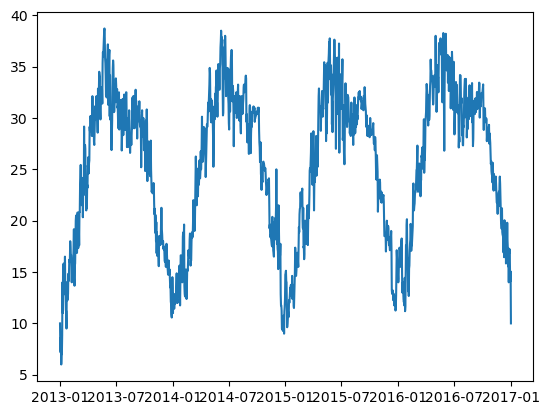

In [7]:
plt.plot(meantemp)

In [57]:
decomposition = seasonal_decompose(meantemp,period=365)
d_seasonal = decomposition.seasonal
d_trend = decomposition.trend
d_residual = decomposition.resid

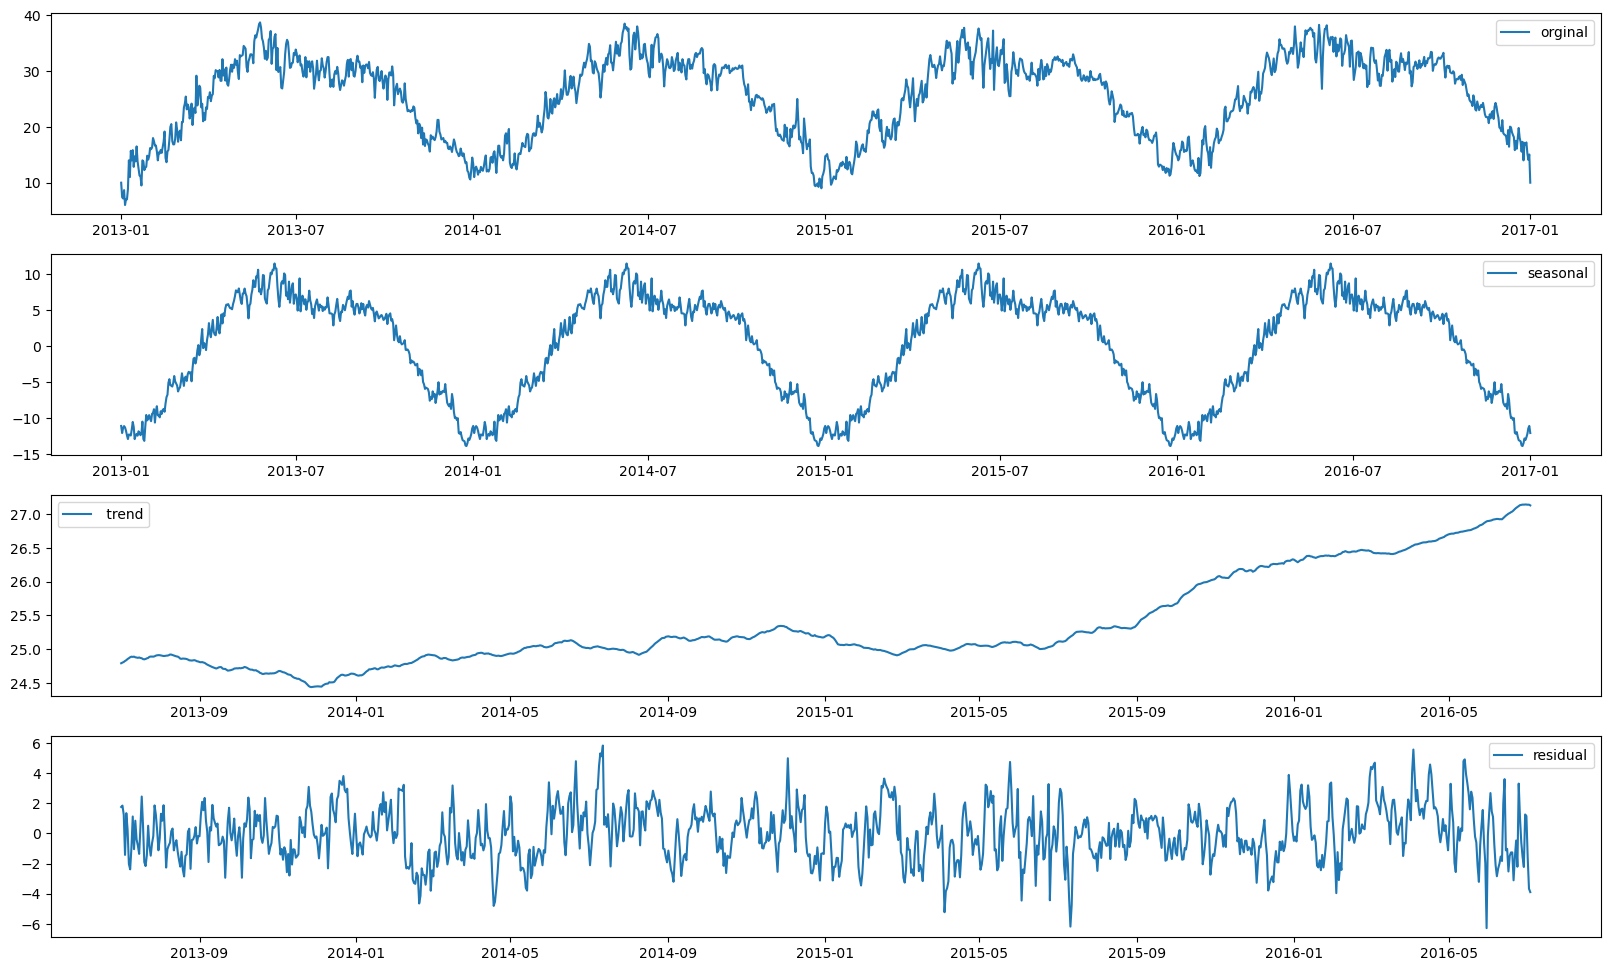

In [58]:
fig,ax = plt.subplots(4,1, figsize= (20,12))

plt.subplot(411)
plt.plot(meantemp, label= 'orginal')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_trend,label= ' trend')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='residual')
plt.legend(loc='best')

In the above figure we can see the original series with different time series component. We can trend component in which there is a upward trend. Seasonal component shows the seasonal pattern in the graph. Residual shows the irregular component.

# 3.Smooth your data and try fdifferent smoothing periods.

In [16]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [17]:
data=train['meantemp']
data

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

In [18]:
# create forecast for different values of alpha. Plot and understand the charts

# dictionary to store the forecast for each alpha
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

In [19]:
d_simple_exp

{0: date
 2013-01-01    10.0
 2013-01-02    10.0
 2013-01-03    10.0
 2013-01-04    10.0
 2013-01-05    10.0
               ... 
 2016-12-28    10.0
 2016-12-29    10.0
 2016-12-30    10.0
 2016-12-31    10.0
 2017-01-01    10.0
 Name: forecast, Length: 1462, dtype: float64,
 0.2: date
 2013-01-01    10.000000
 2013-01-02    10.000000
 2013-01-03     9.480000
 2013-01-04     9.017333
 2013-01-05     8.947200
                 ...    
 2016-12-28    16.833339
 2016-12-29    16.910149
 2016-12-30    16.575739
 2016-12-31    16.079638
 2017-01-01    15.874237
 Name: forecast, Length: 1462, dtype: float64,
 0.6: date
 2013-01-01    10.000000
 2013-01-02    10.000000
 2013-01-03     8.440000
 2013-01-04     7.676000
 2013-01-05     8.270400
                 ...    
 2016-12-28    16.653539
 2016-12-29    16.991851
 2016-12-30    15.939597
 2016-12-31    14.832982
 2017-01-01    14.964772
 Name: forecast, Length: 1462, dtype: float64,
 0.8: date
 2013-01-01    10.000000
 2013-01-02    10.0000

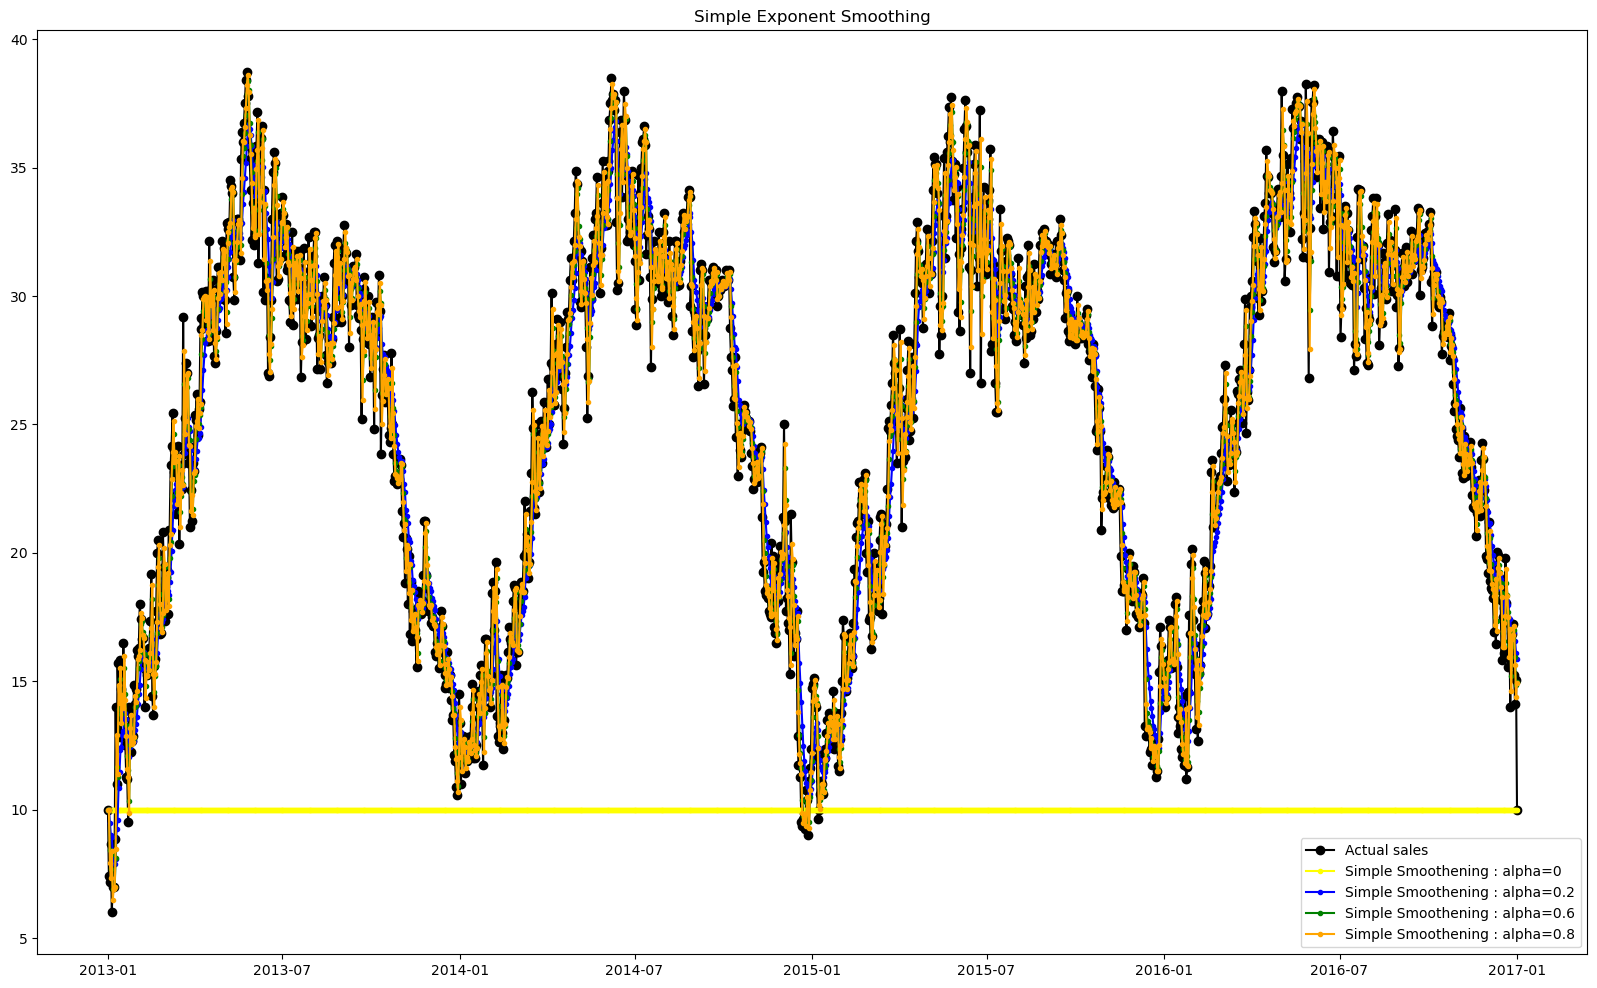

In [20]:
colors = ['yellow','blue','green','orange']
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual sales')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

The simple exponent smoothing we can observe that the higher the value of alpha has a more fitted line tahn the other line with respect to actual meantemp. This line adjust to the changing condition more smoothly.

In [22]:
model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2,smoothing_slope=0.5)

f_dexp = model.fittedvalues
print(f_dexp)

date
2013-01-01     4.787491
2013-01-02     6.698433
2013-01-03     7.777344
2013-01-04     8.532738
2013-01-05     9.450447
                ...    
2016-12-28    15.641779
2016-12-29    15.857609
2016-12-30    15.572463
2016-12-31    14.968052
2017-01-01    14.684460
Length: 1462, dtype: float64


Text(0.5, 1.0, 'Double Exponent Smoothing')

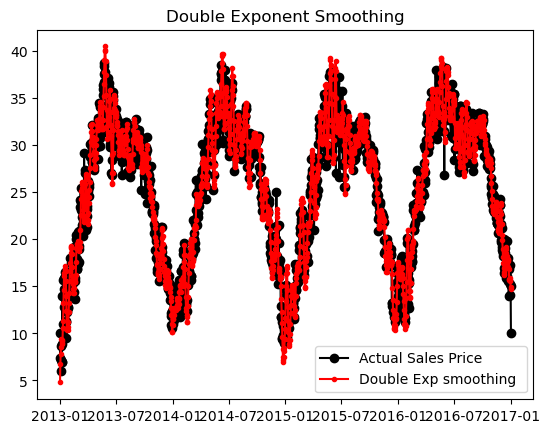

In [23]:
plt.plot(data,marker='o',color='black',label ='Actual Sales Price')
plt.plot(f_dexp,marker='.',color='red',label='Double Exp smoothing ')
plt.legend()
plt.title('Double Exponent Smoothing')

Double exponential Smoothing plot we can see that time series data has no trend. smoothing constatnt from the data to optimize the fitness of line.

# Triple exponents Smoothing

In [24]:
model = ExponentialSmoothing(data.values,trend='add',seasonal='add',seasonal_periods=12).fit()
model

In [25]:
f_texp= model.fittedvalues
f_texp

array([ 9.39203323, 10.03982515,  7.98737888, ..., 15.33570615,
       14.5083247 , 14.86425214])

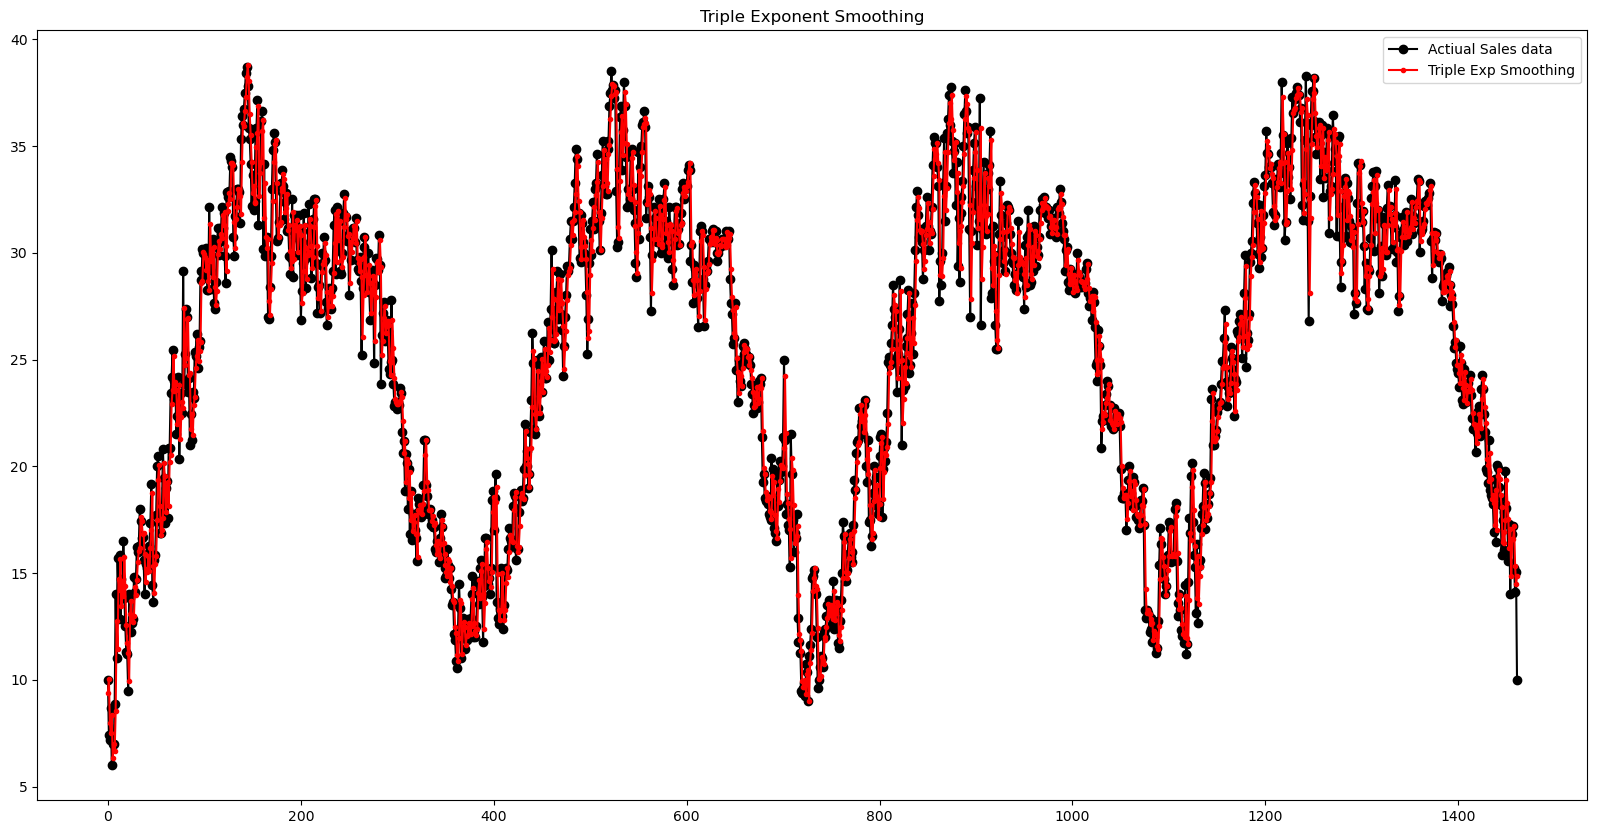

In [26]:
fig,ax = plt.subplots(figsize=(20,10))
plt.plot(data.values,marker='o',color='black',label='Actiual Sales data')
plt.plot(f_texp,marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing');

The triple Exponent smoothing plot shows the yearly seasonality with no trend over the years. In this plot we can see the  seasonality.

# Task 2

# 1.Check if the time series is stationary and use the Augmented Dickey-Fuller test for stationary testing.

In [59]:
def checkStationarity(data):
    pvalue=adfuller(data)[1]
    if(pvalue>0.05):
        msg='p-value ={}, Data is not stationary'.format(pvalue)
    else:
        msg='p-value ={}, Data is stationary'.format(pvalue)
    return(msg)

In [60]:
checkStationarity(data)

'p-value =0.27741213723016156, Data is not stationary'

# 2.If the series is not stationary.apply other methods to achieve stationay.

In [61]:
diff_data =data-data.shift(2)
print(diff_data)

date
2013-01-01         NaN
2013-01-02         NaN
2013-01-03   -2.833333
2013-01-04    1.266667
2013-01-05   -1.166667
                ...   
2016-12-28    0.074534
2016-12-29   -1.611905
2016-12-30   -3.122153
2016-12-31   -0.185464
2017-01-01   -4.095238
Name: meantemp, Length: 1462, dtype: float64


In [62]:
# remove the Nulls from the differenced data
print('Before removing Nulls,total records = ', len(diff_data))
diff_data.dropna(inplace = True)
print('After removing Nulls, total records = ', len(diff_data))
print(diff_data)

Before removing Nulls,total records =  1462
After removing Nulls, total records =  1460
date
2013-01-03   -2.833333
2013-01-04    1.266667
2013-01-05   -1.166667
2013-01-06   -1.666667
2013-01-07    1.000000
                ...   
2016-12-28    0.074534
2016-12-29   -1.611905
2016-12-30   -3.122153
2016-12-31   -0.185464
2017-01-01   -4.095238
Name: meantemp, Length: 1460, dtype: float64


In [63]:
# check if the differenced data is stationary
checkStationarity(diff_data)

'p-value =1.6923684316005197e-08, Data is stationary'

Text(0.5, 1.0, 'Actual vs Differenced data')

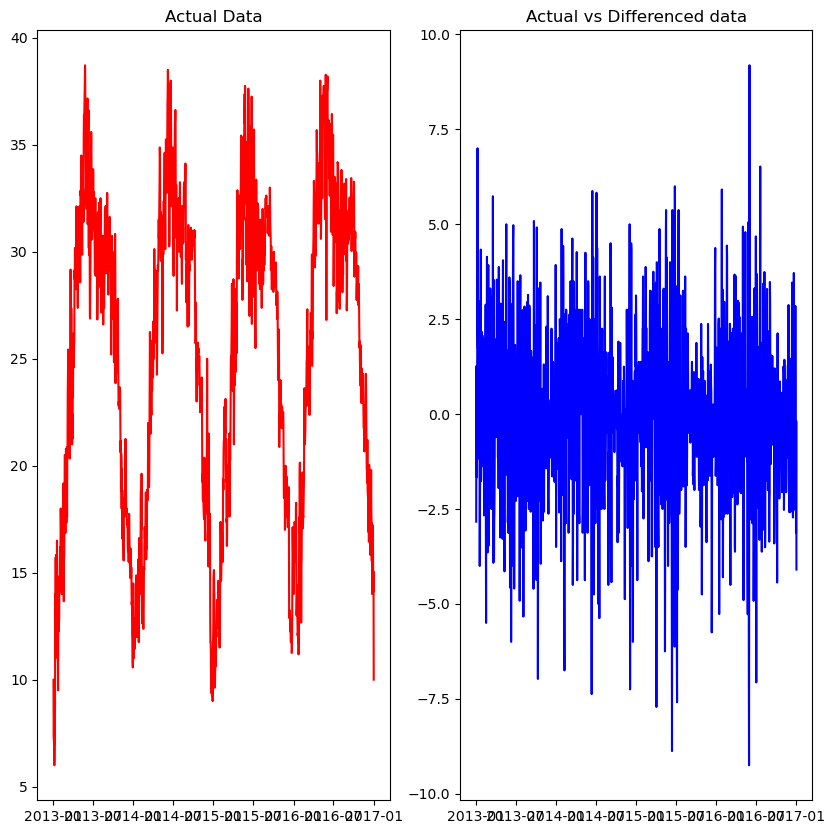

In [64]:
# plot the Actual data and Differenced data
ax = plt.subplots(figsize = (10,10))
plt.subplot(121)

plt.plot(data,color='red')
plt.title('Actual Data')

plt.subplot(122)
plt.plot(diff_data,color='blue')
plt.title('Differenced Data')

plt.title("Actual vs Differenced data")

In the above figure the Actual plot shows the trend in the data which makes the data Not stationary that means we can not proceed with the time series model. But after doing differencing we do not find the trend component in the plot which make the data stationary also indicate that we can now proceed with the time series model

# Task 3: Time Series Models

# 1.Use ACF and PACF to determine the order of the model with 20 lags. Noote the p and q values.

In [65]:
train_weekly=train.rolling(window=7).mean()
train_weekly

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-28,16.480592,73.706304,6.053479,1015.111234
2016-12-29,16.188075,77.992018,6.027629,1015.220077
2016-12-30,15.980252,80.130113,6.750724,1015.742186


In [66]:
train_weekly1=train_weekly.dropna()
train_weekly1

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-07,7.604762,83.295238,2.903810,1017.685714
2013-01-08,7.441497,80.325850,3.924218,1018.121088
2013-01-09,8.384354,74.504422,5.284218,1018.006803
2013-01-10,8.931973,70.932993,5.679456,1017.578231
2013-01-11,9.938776,68.069048,7.013469,1017.431973
...,...,...,...,...
2016-12-28,16.480592,73.706304,6.053479,1015.111234
2016-12-29,16.188075,77.992018,6.027629,1015.220077
2016-12-30,15.980252,80.130113,6.750724,1015.742186


In [67]:
data1=train_weekly1['meantemp']

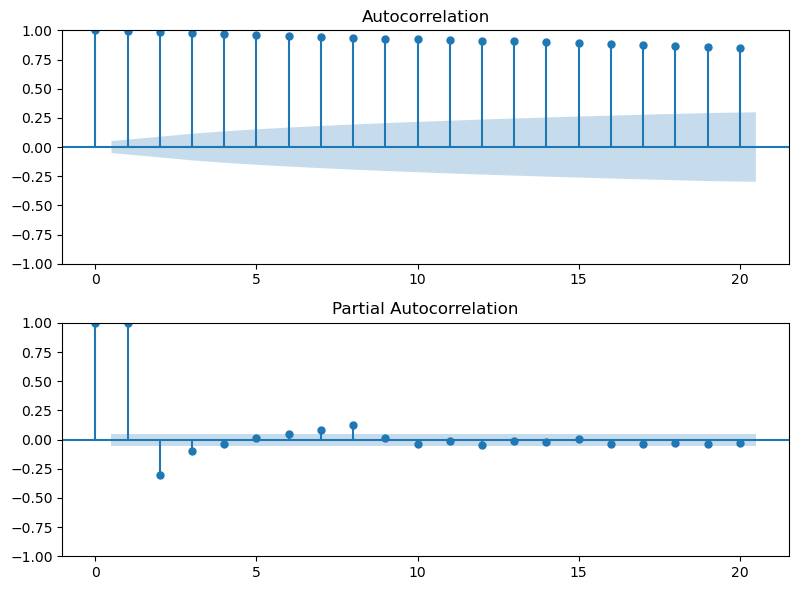

In [68]:
import statsmodels.api as sm
fig = plt.figure(figsize = (8,6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(data1, lags=20, ax = ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(data1, lags=20, ax = ax2)
plt.tight_layout()

The lag_values in Autocorrelation is 20. and The lag_values in Partial Autocorrelation is 3.

# 2.Prepare the AR model once stationary is achieved. Find out the most suitable Ar model by comparing different lag values.

In [37]:
ar_m1 = ARIMA(data,order=(1,0,0)).fit()  #with p=1
ar_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2818.516
Date:                Sat, 09 Sep 2023   AIC                           5643.032
Time:                        17:20:46   BIC                           5658.894
Sample:                    01-01-2013   HQIC                          5648.949
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6679      1.708     14.444      0.000      21.321      28.015
ar.L1          0.9763      0.006    172.768      0.000       0.965       0.987
sigma2         2.7614      0.076     36.140      0.000       2.612       2.911
===================================================================================
Ljung-Box (L1) (Q):                  31.00   Jarque-Bera (JB):               303.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.44
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
ar_m2=ARIMA(data,order=(2,0,0)).fit() #with p=2
ar_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2801.932
Date:                Sat, 09 Sep 2023   AIC                           5611.863
Time:                        17:20:53   BIC                           5633.014
Sample:                    01-01-2013   HQIC                          5619.753
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3693      1.997     12.204      0.000      20.456      28.283
ar.L1          0.8298      0.020     40.834      0.000       0.790       0.870
ar.L2          0.1507      0.020      7.463      0.000       0.111       0.190
sigma2         2.6993      0.079     34.059      0.000       2.544       2.855
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               227.43
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.43
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
ar_m3 = ARIMA(data,order=(3,0,0)).fit() #with p=3
ar_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2795.513
Date:                Sat, 09 Sep 2023   AIC                           5601.027
Time:                        17:20:53   BIC                           5627.465
Sample:                    01-01-2013   HQIC                          5610.889
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1221      2.210     10.916      0.000      19.791      28.453
ar.L1          0.8158      0.021     39.750      0.000       0.776       0.856
ar.L2          0.0729      0.028      2.591      0.010       0.018       0.128
ar.L3          0.0940      0.024      3.988      0.000       0.048       0.140
sigma2         2.6756      0.079     34.056      0.000       2.522       2.830
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               228.99
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.42
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretion

AIC score of AR(1) model is 5643.032

AIC score of AR(2) model is 5611.863

AIC score of AR(3) model is 5601.027

Lesser the AIC score is better the model. Hence AR(3) is the better model

# 3.Prepare a MA model using stationary data. Find out the most suitable AR model by comparing different lag values.

In [40]:
ma_m1=ARIMA(data,order=(0,0,1)).fit() #with q=1
ma_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -4231.514
Date:                Sat, 09 Sep 2023   AIC                           8469.027
Time:                        17:21:18   BIC                           8484.890
Sample:                    01-01-2013   HQIC                          8474.944
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4860      0.222    114.768      0.000      25.051      25.921
ma.L1          0.8297      0.015     56.867      0.000       0.801       0.858
sigma2        19.1057      0.932     20.507      0.000      17.280      20.932
===================================================================================
Ljung-Box (L1) (Q):                 687.39   Jarque-Bera (JB):                52.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.35
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
ma_m1=ARIMA(data,order=(0,0,2)).fit() #with q=2
ma_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3760.196
Date:                Sat, 09 Sep 2023   AIC                           7528.393
Time:                        17:21:18   BIC                           7549.543
Sample:                    01-01-2013   HQIC                          7536.282
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4766      0.245    104.073      0.000      24.997      25.956
ma.L1          1.1755      0.020     58.847      0.000       1.136       1.215
ma.L2          0.6669      0.020     32.716      0.000       0.627       0.707
sigma2        10.0216      0.417     24.011      0.000       9.204      10.840
===================================================================================
Ljung-Box (L1) (Q):                 262.59   Jarque-Bera (JB):                10.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.17
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
ma_m1=ARIMA(data,order=(0,0,3)).fit() #with q=3
ma_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -3496.253
Date:                Sat, 09 Sep 2023   AIC                           7002.507
Time:                        17:21:23   BIC                           7028.945
Sample:                    01-01-2013   HQIC                          7012.369
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4651      0.271     94.007      0.000      24.934      25.996
ma.L1          1.2617      0.023     53.840      0.000       1.216       1.308
ma.L2          1.0827      0.031     34.933      0.000       1.022       1.143
ma.L3          0.5088      0.023     22.065      0.000       0.464       0.554
sigma2         6.9827      0.262     26.614      0.000       6.468       7.497
===================================================================================
Ljung-Box (L1) (Q):                  88.90   Jarque-Bera (JB):                 6.93
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               0.78   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretation

AIC score of AR(1) model is 8469.027

AIC score of AR(2) model is 7528.393

AIC score of AR(3) model is 7002.507

Lesser the AIC score is better the model. Hence AR(3) is the better model

# 4.Use the ARMA model to predict the mean temperature of Delhi.

In [44]:
data=train['meantemp']
data

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

In [87]:
aa=int(0.7*len(data))
train=data.iloc[:aa]
test=data.iloc[aa:]
print('train={}, test={}'.format(len(train),len(test)))

train=1023, test=439


In [86]:
# split the data into train and test
train
test
print("train= {}, test= {}".format(len(train),len(test)))

train= 1023, test= 439


# Bulid the ARMA model

In [88]:
p=1; q=2
m1=ARIMA(data,order=(p,0,q))
r1=m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2783.988
Date:                Sat, 09 Sep 2023   AIC                           5577.976
Time:                        17:35:57   BIC                           5604.414
Sample:                    01-01-2013   HQIC                          5587.838
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2799      2.880      8.084      0.000      17.636      28.924
ar.L1          0.9922      0.003    302.824      0.000       0.986       0.999
ma.L1         -0.2302      0.021    -10.775      0.0

In [89]:
p=2; q=1
m1=ARIMA(data,order=(p,0,q))
r1=m1.fit()                    
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2770.534
Date:                Sat, 09 Sep 2023   AIC                           5551.068
Time:                        17:35:58   BIC                           5577.505
Sample:                    01-01-2013   HQIC                          5560.929
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8733      4.018      5.444      0.000      13.998      29.748
ar.L1          1.5661      0.048     32.754      0.000       1.472       1.660
ar.L2         -0.5678      0.047    -11.978      0.0

In [90]:
p=2; q=2
m1=ARIMA(data,order=(p,0,q)) #p,d,q ,d is differentiating
r1=m1.fit()                    # our time series is stationary that wise we don't using the d.
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2770.394
Date:                Sat, 09 Sep 2023   AIC                           5552.789
Time:                        17:35:59   BIC                           5584.514
Sample:                    01-01-2013   HQIC                          5564.623
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4266      4.057      5.281      0.000      13.474      29.379
ar.L1          1.5361      0.088     17.391      0.000       1.363       1.709
ar.L2         -0.5380      0.088     -6.130      0.0

In [91]:
#prediction for test data
prediction=r1.predict(0,len(test)-1)
prediction

2013-01-01    21.426614
2013-01-02    10.217816
2013-01-03     8.028663
2013-01-04     7.751403
2013-01-05     8.837041
                ...    
2014-03-11    19.764813
2014-03-12    20.401982
2014-03-13    19.904179
2014-03-14    19.163684
2014-03-15    19.632691
Freq: D, Name: predicted_mean, Length: 439, dtype: float64

# Print actual, predicted, and error values to compare

In [92]:
actual=[]; pred=[]
for i in range(len(prediction)):
    actual.append(test[i])
    pred.append(prediction[i])
df_res=pd.DataFrame({'Actual': actual, 'predicted': pred})
df_res['Error']=df_res.Actual-df_res.predicted
df_res

,Actual,predicted,Error
0,26.500000,21.426614,5.073386
1,24.750000,10.217816,14.532184
2,24.000000,8.028663,15.971337
3,24.875000,7.751403,17.123597
4,26.375000,8.837041,17.537959
...,...,...,...
434,17.217391,19.764813,-2.547421
435,15.238095,20.401982,-5.163887
436,14.095238,19.904179,-5.808941
437,15.052632,19.163684,-4.111052


# Perform the LJung-Box test

In [94]:
pvalue=sm.stats.acorr_ljungbox(r1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue<0.05:
    print('Reject H0. Bad model')
else:
    print('Fail to Reject H0. Good model')

Fail to Reject H0. Good model


# Calculate MSE and RMSE of the Model from the test.

In [97]:
# MSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.Actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(2,2)
	MSE = 79.23411025996158
	RMSE = 8.90135440592956


# Plot the actual data and predicted data.

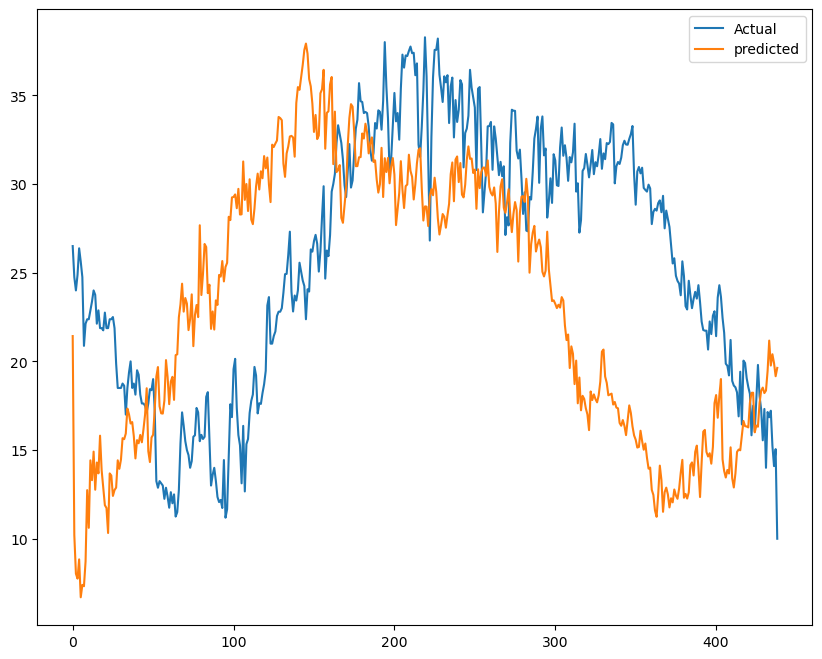

In [100]:
df_res.Actual.plot(figsize=(10,8))
df_res.predicted.plot()
plt.legend()